## Data Understanding
<p>Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.
    13M rows containing counts of criminal reports by month, LSOA borough, and major/minor category.

<li> lsoa_code = merepresentasikan kode area polisi
<li> borough = daerah di london yang terkait
<li> major_category = kategori kejahatan mayor
<li> minor_category = kategori kejahatan minor
<li> value = jumlah kejahatan untuk wilayah tertentu pada bulan tertentu
<li> year = statistik ringkasan tahunan
<li> month = statistik ringkasan bulanan

## Exploratory Data Analysis

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
sns.set(style = 'whitegrid', color_codes = True)

from wordcloud import WordCloud, STOPWORDS
import folium


import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = [16, 12]

%matplotlib inline

### Read The Data

In [2]:
df_crime = pd.read_csv("../dataset/london_crime.csv")

### Show the top 5 data

In [3]:
df_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


### Show 5 The Bottom of Data

In [4]:
df_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


### Show Dimension of Data

In [5]:
df_crime.shape

(13490604, 7)

Terdapat 13.490.604 baris, dan 7 kolom pada dataset ini

In [6]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### Identify Missing Values

In [7]:
df_crime.isna().values.any()

False

In [8]:
df_crime.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Mengindentifikasi pada dataset, apakah ada data yang kosong atau null. Apabila ada data yang kosong, maka output dari code dibawah akan menghasilkan True, apabila tidak ada yang null maka nilainya akan False. Pada dataset ini, tidak ada data yang null.

### Identify Duplicate entries/rows

In [9]:
df_crime.duplicated().values.any()

False

In [10]:
df_crime.duplicated().value_counts()

False    13490604
dtype: int64

Mengindentifikasi apakah pada dataset ini terdapat duplikasi data atau tidak. Ternyata tidak ada data yang duplikasi pada dataset ini.

### Data Describe
<li> Count = Jumlah data/baris pada dataset
<li> mean = nilai rata rata pada setiap kolom
<li> std = Standar Deviasi pada setiap kolom
<li> min = Nilai paling minimum pada setiap kolom
<li> 25% = Q1
<li> 50% = Q2
<li> 75% = Q3
<li> max = Nilai maksimum pada setiap kolom

In [11]:
df_crime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [12]:
df_crime['date'] = pd.to_datetime(df_crime[['year', 'month']].assign(DAY=1)) # Menggabungkan bulan dan tahun ke dalam format penanggalan
df_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-01


In [13]:
df_crime = df_crime[df_crime['value'] > 0] # Sortir yang memiliki nilai lebih dari Nol
df_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,date
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,2016-08-01
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5,2009-05-01
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1,2012-01-01
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2,2013-02-01
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4,2016-04-01


### Area Chart

#### Question
<ul><li>Berapa banyak angka kriminalitas setiap tahun?

In [14]:
df_area = df_crime.groupby(['date', 'borough']).sum()['value'].reset_index()
df_area.head()

,date,borough,value
0,2008-01-01,Barking and Dagenham,1615
1,2008-01-01,Barnet,2134
2,2008-01-01,Bexley,1346
3,2008-01-01,Brent,2136
4,2008-01-01,Bromley,2097


In [15]:
df_area

,date,borough,value
0,2008-01-01,Barking and Dagenham,1615
1,2008-01-01,Barnet,2134
2,2008-01-01,Bexley,1346
3,2008-01-01,Brent,2136
4,2008-01-01,Bromley,2097
...,...,...,...
3515,2016-12-01,Sutton,871
3516,2016-12-01,Tower Hamlets,2405
3517,2016-12-01,Waltham Forest,1718
3518,2016-12-01,Wandsworth,1913


In [16]:
df_area = df_crime.groupby(['date', 'borough']).sum()['value'].reset_index().pivot(index = 'date', columns='borough', values = 'value')
df_area.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,1615.0,2134.0,1346.0,2136.0,2097.0,2610.0,NaN,2623.0,2724.0,2121.0,...,1126.0,2876.0,1852.0,956.0,2990.0,1133.0,2125.0,2047.0,2163.0,3957.0
2008-02-01,1580.0,1861.0,1296.0,1895.0,1988.0,2608.0,NaN,2390.0,2679.0,1956.0,...,1172.0,2510.0,1739.0,972.0,2875.0,1021.0,2010.0,1983.0,2111.0,3880.0
2008-03-01,1417.0,1992.0,1342.0,1946.0,1923.0,2720.0,NaN,2394.0,2345.0,1920.0,...,1124.0,2492.0,1760.0,897.0,2703.0,1056.0,2129.0,1981.0,2010.0,3896.0
2008-04-01,1522.0,1999.0,1240.0,1797.0,1869.0,2532.0,NaN,2207.0,2266.0,1922.0,...,1112.0,2290.0,1795.0,877.0,2713.0,1039.0,2115.0,1976.0,1993.0,3725.0
2008-05-01,1460.0,2144.0,1280.0,2026.0,2027.0,2680.0,NaN,2501.0,2457.0,1848.0,...,1153.0,2582.0,1718.0,896.0,2867.0,1151.0,2143.0,2135.0,1938.0,3849.0


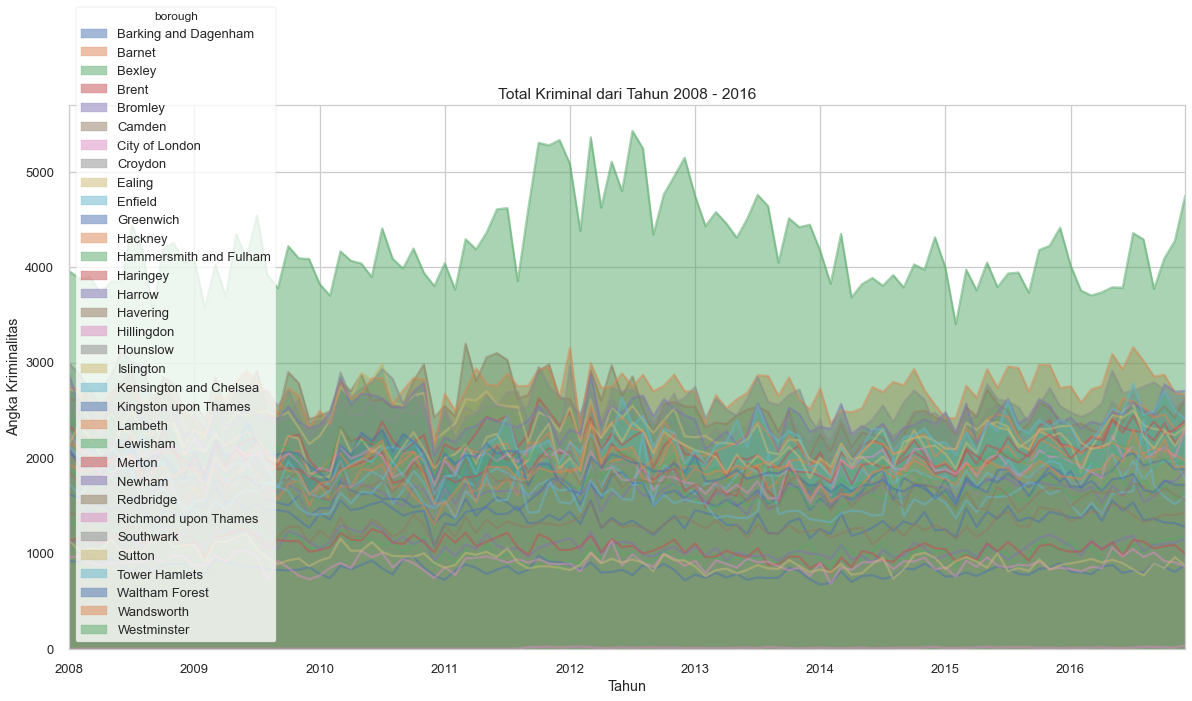

In [17]:
df_area.plot(kind='area', stacked = False, figsize=(20,10))


plt.title('Total Kriminal dari Tahun 2008 - 2016') # Menambahkan judul di area plot
plt.ylabel('Angka Kriminalitas') # Menambahkan tulisan di y-label
plt.xlabel('Tahun') # Menambahkan tulisan di x-label

plt.show()

#### Insight

Berdasarkan grafik, distrik <b>Westminster</b> memiliki angka kriminalitas paling tinggi. Pada tahun 2008 hingga tahun 2010 tidak ada kenaikan angka kriminalitas secara signifikan atau jumlah kriminalitas masihlah tetap walaupun ada kenaikan sedikit maupun penurunan sedikit, hingga pada <b>tahun 2011 mulai naik secara signifikan dan puncak kriminalitas terjadi pada tahun 2012</b>, kemudian di tahun 2013 hingga tahun 2014 mulai ada penurunan angka kriminalitas secara signifikan dan di tahun 2015 hingga 2016 angka kriminalitas sama seperti pada tahun 2008 hingga tahun 2010

### Histogram

#### Question:
<ul><li>Jenis kriminalitas apa yang paling sering terjadi di Distrik Westminster?
   

In [18]:
df_hist = df_crime[df_crime['borough'] == 'Westminster'].groupby(['date', 'major_category']).agg({'value':'sum'})
df_hist

value
date       major_category                    
2008-01-01 Burglary                       237
           Criminal Damage                218
           Drugs                          244
           Fraud or Forgery               128
           Other Notifiable Offences       39
...                                       ...
2016-12-01 Drugs                          124
           Other Notifiable Offences       44
           Robbery                        221
           Theft and Handling            2868
           Violence Against the Person    963

[760 rows x 1 columns]

In [19]:
df_hist = df_hist.unstack('major_category').head()
df_hist

value                                          \
major_category Burglary Criminal Damage  Drugs Fraud or Forgery   
date                                                              
2008-01-01        237.0           218.0  244.0            128.0   
2008-02-01        212.0           211.0  344.0            145.0   
2008-03-01        210.0           232.0  385.0              NaN   
2008-04-01        274.0           232.0  284.0              NaN   
2008-05-01        279.0           219.0  405.0              NaN   

                                                                  \
major_category Other Notifiable Offences Robbery Sexual Offences   
date                                                               
2008-01-01                          39.0    93.0            37.0   
2008-02-01                          33.0   113.0            22.0   
2008-03-01                          60.0    98.0             NaN   
2008-04-01                          51.0   119.0             NaN   
2008-05-01                          44.0   106.0             NaN   

                                                               
major_category Theft and Handling Violence Against the Person  
date                                                           
2008-01-01                 2407.0                       554.0  
2008-02-01                 2327.0                       473.0  
2008-03-01                 2418.0                       493.0  
2008-04-01                 2301.0                       464.0  
2008-05-01                 2278.0                       518.0

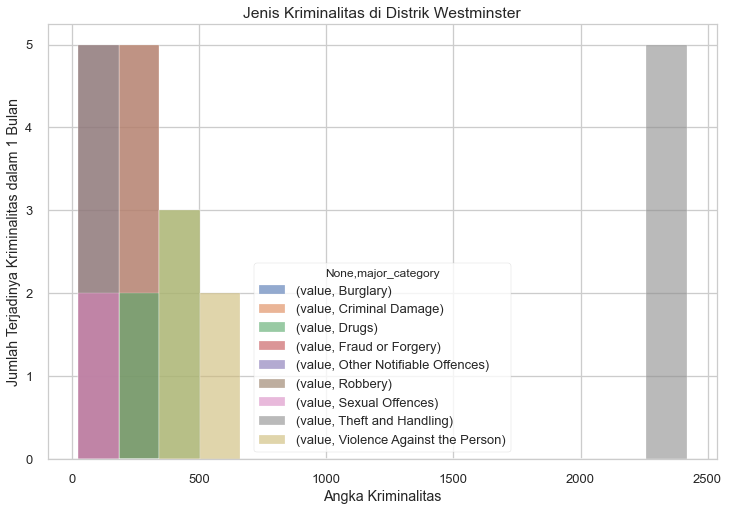

In [20]:
df_hist.plot(kind='hist',
             figsize=(12, 8),
             bins=15,
             alpha=0.6,
            
            )

plt.title('Jenis Kriminalitas di Distrik Westminster') # Menambahkan judul pada area plot
plt.ylabel('Jumlah Terjadinya Kriminalitas dalam 1 Bulan') # Menambahkan tulisan di y-label
plt.xlabel('Angka Kriminalitas') # Menambahkan tulisan di x-label

plt.show()

#### Insights
Berdasarkan histogram, jenis kriminalitas yang paling sering terjadi dalam 1 bulan di distrik Westminster ialah Sexual Offences. Kemudian untuk posisi kedua dan ketiga di duduki oleh jenis kriminalitas Burglary dan Voilence Against the Person

### Bar Chart

#### Question
<ul><li>Pada tahun berapa distrik Westminster tercatat memiliki angka kriminalitas tinggi?

In [21]:
df_bar = df_crime.loc[df_crime['borough'] == 'Westminster']
df_bar.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,date
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4,2014-04-01
187,E01004654,Westminster,Theft and Handling,Theft From Motor Vehicle,3,2013,2,2013-02-01
227,E01004750,Westminster,Theft and Handling,Theft From Motor Vehicle,6,2016,8,2016-08-01
280,E01004679,Westminster,Theft and Handling,Theft From Shops,5,2008,8,2008-08-01
697,E01004736,Westminster,Violence Against the Person,Common Assault,10,2013,1,2013-01-01


In [22]:
df_bar = df_crime.loc[df_crime['borough'] == 'Westminster'].groupby(['year', 'borough']).sum()['value'].reset_index()
df_bar.head()

,year,borough,value
0,2008,Westminster,47846
1,2009,Westminster,48456
2,2010,Westminster,48116
3,2011,Westminster,54243
4,2012,Westminster,59226


In [23]:
df_bar = df_bar.pivot(index='year', columns='borough', values='value')
df_bar

borough,Westminster
year,
2008,47846
2009,48456
2010,48116
2011,54243
2012,59226
2013,53852
2014,47564
2015,47395
2016,48330


<AxesSubplot:xlabel='year'>

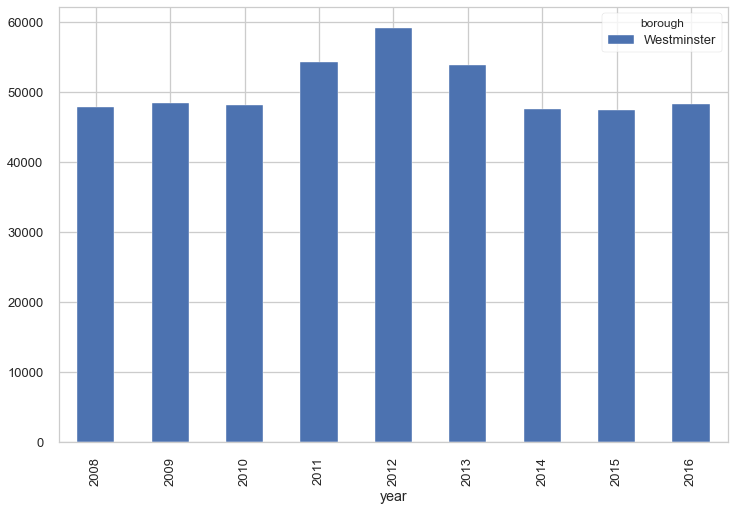

In [24]:
df_bar.plot(kind='bar', figsize=(12, 8))

#### Insights
Berdasarkan bar chart, pada tahun <b>2012</b> distrik Westminster memiliki angka kriminalitas tinggi, dimana pada tahun tersebut tercatat sebanyak kurang lebih 60.000 angka kriminalitas

### Pie Chart

#### Question:
<ul><li>Kejahatan jenis apa yang paling sering terjadi di London?

In [25]:
df_over_zero = df_crime[df_crime['value'] > 0]
df_over_zero.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,date
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,2016-08-01
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5,2009-05-01
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1,2012-01-01
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2,2013-02-01
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4,2016-04-01


In [26]:
df_pie = df_over_zero.groupby('major_category', axis = 0).sum()['value'].reset_index()
df_pie

,major_category,value
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
3,Fraud or Forgery,5325
4,Other Notifiable Offences,106349
5,Robbery,258873
6,Sexual Offences,1273
7,Theft and Handling,2661861
8,Violence Against the Person,1558081


In [27]:
df_pie = df_pie.set_index('major_category')

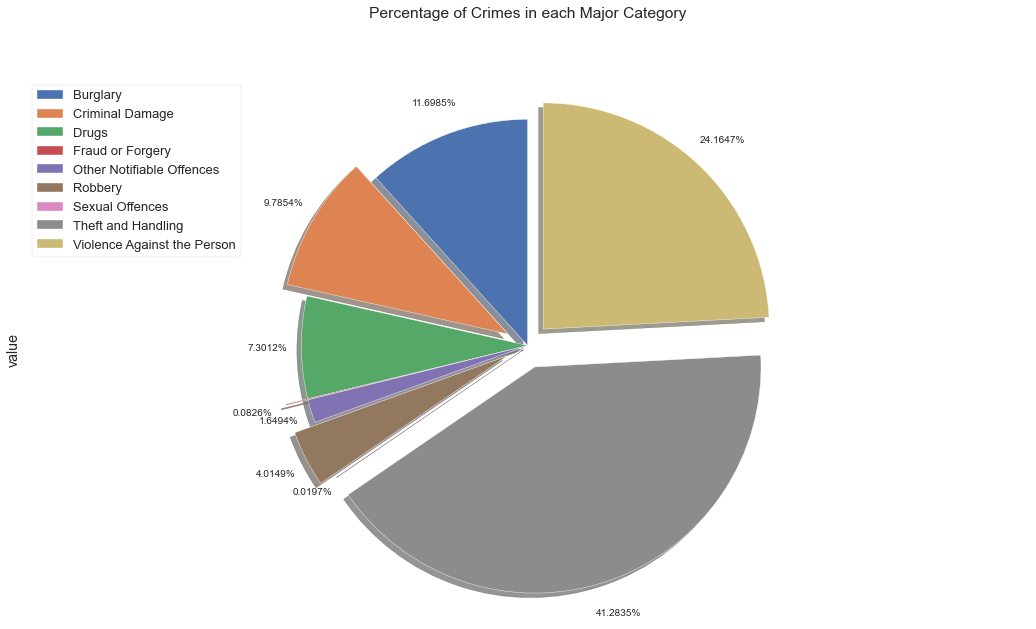

In [28]:
df_pie['value'].plot(kind='pie',
                     figsize=(18, 10),
                     autopct='%1.4f%%',
                     startangle=90,
                     shadow=True,
                     labels = None,
                     pctdistance = 1.15,
                     explode = [0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0.1])

plt.title('Percentage of Crimes in each Major Category', y = 1.1)
plt.axis('equal')

plt.legend(labels=df_pie.index, loc='upper left')

plt.show()

Pada pie chart diatas, sangat jelas menunjukan bahwa jenis kejahatan yang paling banyak adalah "Theft and Handling" atau pencurian. Dengan 41.2835% atau 2.661.861 menunjukan hampir setengah nya bahwa kejahatan di kawasan London pada tahun 2008 hingga 2016 menjadikan jenis kejahatan "Theft and Handling" paling sering ditemui. Kemudian yang paling rendah ialah jenis kejahatan "Sexual Offences" dengan menunjukan di angka 0.0197% atau 1.273 kejadian.

### Box Plot

#### Question:
Berdasarkan total kasus kriminal yang terjadi setiap bulan dalam 5 tahun, bulan manakah yang memiliki kriminalitas terbanyak?

In [29]:
df_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,date
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,2016-08-01
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5,2009-05-01
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1,2012-01-01
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2,2013-02-01
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4,2016-04-01


In [30]:
df_box = pd.DataFrame(df_crime.groupby(['year', 'month'])['value'].sum().sort_values(ascending=False))
df_box.head()

,,value
year,month,
2012,3,67537
2016,7,65519
2008,1,65419
2012,5,64344
2008,7,64126


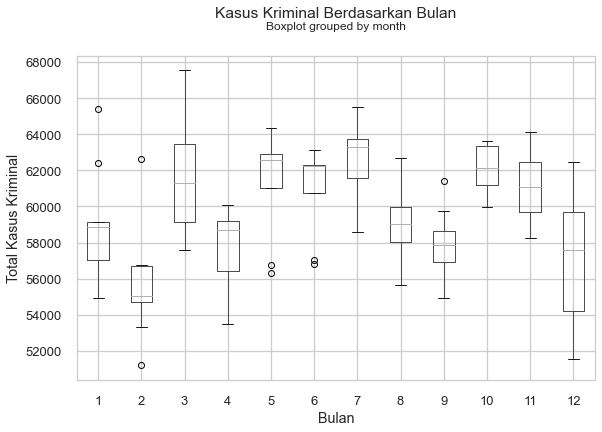

In [31]:
ax = df_box.boxplot(column='value', by='month', figsize=(9, 6))

ax.set_title("Kasus Kriminal Berdasarkan Bulan", y=1.1)
ax.set_ylabel("Total Kasus Kriminal")
ax.set_xlabel("Bulan")

plt.show()

#### Insights:
Berdasarkan boxplot, dalam 9 tahun terakhir,  jumlah kasus kriminal paling tinggi terjadi pada bulan ke 3

### Scatter Plot

#### Question:
Ditahun manakah distrik Wesminster memiliki kasus kriminalitas paling banyak?

In [32]:
df_scatter = df_crime[df_crime['borough'] == 'Westminster'].groupby(['year']).sum()
df_scatter

,value,month
year,,
2008,47846,75653
2009,48456,74744
2010,48116,72602
2011,54243,77303
2012,59226,83145
2013,53852,81560
2014,47564,83600
2015,47395,84199
2016,48330,88727


In [33]:
df_scatter = df_scatter.reset_index()
df_scatter

,year,value,month
0,2008,47846,75653
1,2009,48456,74744
2,2010,48116,72602
3,2011,54243,77303
4,2012,59226,83145
5,2013,53852,81560
6,2014,47564,83600
7,2015,47395,84199
8,2016,48330,88727


In [34]:
df_scatter.sort_values(['value'], ascending=False)

,year,value,month
4,2012,59226,83145
3,2011,54243,77303
5,2013,53852,81560
1,2009,48456,74744
8,2016,48330,88727
2,2010,48116,72602
0,2008,47846,75653
6,2014,47564,83600
7,2015,47395,84199


In [35]:
df_scatter['year'] = range(2008, 2017)

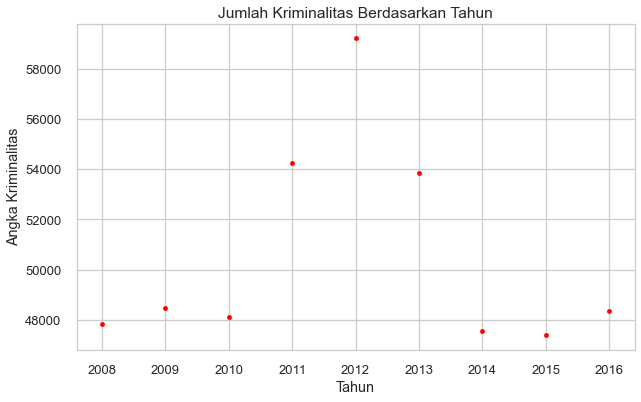

In [36]:
df_scatter.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='red')

plt.title('Jumlah Kriminalitas Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Angka Kriminalitas')

plt.show()

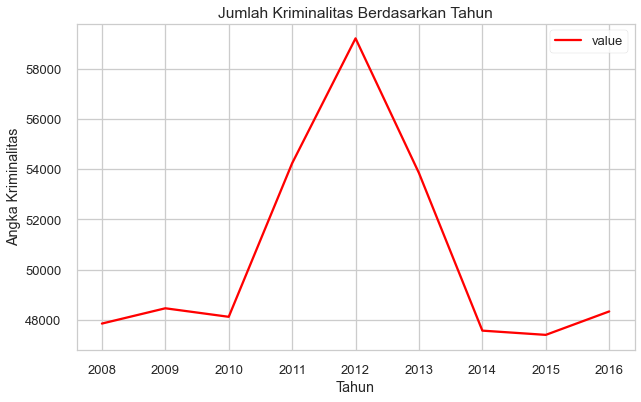

In [37]:
df_scatter.plot(kind='line', x='year', y='value', figsize=(10, 6), color='red')

plt.title('Jumlah Kriminalitas Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Angka Kriminalitas')

plt.show()

#### Insights:
Berdasarkan scatter plot, jumlah kriminalitas pada distrik Westminster mengalami lonjakan yang signifikan pada tahun 2011 dan 2012 dimana mencapai lebih dari 59 ribu kasus. Setelah tahun 2012, tepatnya pada 2014 terjadi penurunan jumlah kejahatan dimana angka kejahatan pada tahun 2014 turun hingga 47 ribu kasus hingga tahun 2015 menurun

### Word Cloud

In [38]:
df_word = df_crime[df_crime['year'].isin([2014, 2015, 2016])]
df_word.head(2)

,lsoa_code,borough,major_category,minor_category,value,year,month,date
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,2016-08-01
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4,2016-04-01


In [39]:
df_word = df_word[df_word['borough'].isin(['Westminster'])]
df_word.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,date
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4,2014-04-01
227,E01004750,Westminster,Theft and Handling,Theft From Motor Vehicle,6,2016,8,2016-08-01
700,E01004659,Westminster,Violence Against the Person,Common Assault,1,2016,2,2016-02-01
1170,E01004731,Westminster,Violence Against the Person,Harassment,4,2014,4,2014-04-01
1414,E01004695,Westminster,Robbery,Personal Property,3,2015,5,2015-05-01


In [40]:
df_word = df_word['major_category'].str.cat(sep= ' ')

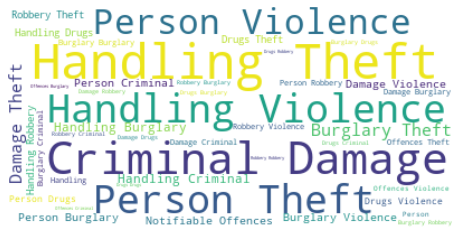

In [41]:
stopwords = set(STOPWORDS)

df_wordcloud = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

df_wordcloud.generate(df_word)

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(12)

plt.imshow(df_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
latitude = 39.842285
longitude = -105.043716

westminster_map = folium.Map(location=[latitude,longitude], zoom_start=12)
    
westminster_map

### Kesimpulan
Berdasarkan data yang didapatkan, distrik Westminster memiliki kasus kriinalitas paling tinggi diantara distrik lainnya sehingga perlu lebih banyak polisi di daerah ini. Serta polisi-polisi yang ditempatkan di distrik Westminster harus memiliki keterampilan untuk menangani jenis kasus <b>Theft and Handling, Violence Against the Person, dan Burglary (pencurian dan kekerasan).</b>